<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/rabi/notebooks/rabiuls_notebook/RH_SGDClassifier_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Regularized linear models with Stochastic Gradient Descent (SGD)

# Importing Library & Downloading Raw data

In [ ]:
# Importing basic python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
from glob import glob
from scipy import ndimage as ndi

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from skimage.transform import resize

In [ ]:
#mounting google drive and navigating to project folder
from google.colab import drive
drive.mount('/content/drive')
# %cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Mounted at /content/drive


#this section is for FER data set 

In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df = pd.read_csv('/content/sift_data.csv')
print(df.shape)
df.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
df.columns

Index(['usage', 'emotion', 'histogram'], dtype='object')

In [ ]:
np.array(df.pixels[0].split(' ')).astype(float).shape

In [ ]:
df.pixels = df.pixels.apply(lambda x: np.array(df.pixels[0].split(' ')).astype(float) )

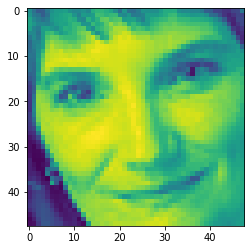

In [ ]:
plt.imshow(df.pixels[0].reshape(48,48))

In [ ]:
X = np.array(df['pixels'])
y = np.array(df['emotion'])
print(X.shape, y.shape)

(35328,) (35328,)


In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(35328, 48*48)
X.shape

(35328, 2304)

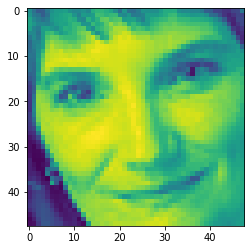

In [ ]:
plt.imshow(X[0].reshape(48,48))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf.predict(X_Test)
accuracy_score(y_Test, y_pred)

In [ ]:
accuracy_score(y_Test, y_pred)

0.13897537503538068

# this section is for SIFT dat 

In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df_sift = pd.read_csv('/content/sift_data.csv')
print(df_sift.shape)
df_sift.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
print('Columns: ', df_sift.columns)
print('shape of df: ', df_sift.shape)
print('unique emotion labels: ', df_sift.emotion.unique())
print('data type for (emotion, data): ', type(df_sift.emotion[0]), type(df_sift.histogram[0]), len(df_sift.histogram[0]))

Columns:  Index(['usage', 'emotion', 'histogram'], dtype='object')
shape of df:  (35322, 3)
unique emotion labels:  [3 4 2 5 6 0]
data type for (emotion, data):  <class 'numpy.int64'> <class 'str'> 57


In [ ]:
print('len of histogram: ',len(df_sift.histogram[0].split(' ')))
print( 'value counts for each emotion: ','\n', df_sift.emotion.value_counts())

len of histogram:  29
value counts for each emotion:  
 3    8987
6    6195
4    6076
2    5119
0    4945
5    4000
Name: emotion, dtype: int64


In [ ]:
emotion_remap = {0:0, 2:1, 3:2, 4:3, 5:4, 6:5}
print('data type for emotion: ',type(df_sift.emotion[0]))


data type for emotion:  <class 'numpy.int64'>


In [ ]:
#remapping each emotion to a new label
df_sift.emotion = df_sift.emotion.apply(lambda x: emotion_remap[x])
print( 'value counts for each emotion after remaping: ','\n', sorted(df_sift.emotion.value_counts()))

value counts for each emotion after remaping:  
 [4000, 4945, 5119, 6076, 6195, 8987]


In [ ]:
#chikako's funciton 
def load_data(df, sift):
    image_data = []
    
    for index, row in df.iterrows():
        if sift == 1:
            field = row.histogram
        else:
            field = row.pixels
        image = np.fromstring(field, dtype=int, sep=' ')
        #scale = np.fromstring(row.scaled_pixels, dtype=int, sep=' ')
        #image = np.reshape(image, (48, 48))
        image_data.append(image)
        #image_scaled.append(scale)
        
    return image_data

In [ ]:
df_train = df_sift[df_sift['usage']=='train']
df_test = df_sift[df_sift['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [ ]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,y_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

Test Accuracy: 0.251


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
#Basic SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

SGDClassifier(random_state=42)

0.2251946213729653

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

In [ ]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.1692324 , 0.20660367, 0.14555685])

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
        'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet']

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 

eta0 = [1, 10, 100] 

param_distributions = dict(loss=loss,penalty=penalty, alpha=alpha,learning_rate=learning_rate,
                           class_weight=class_weight, eta0=eta0)


In [ ]:
# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
random_result = random.fit(X_train, y_train) 

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
accuracy_score(model_pred,y_test)

0.2005661712668082

In [ ]:
pip install parfit

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
# X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [ ]:


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    #'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)

In [ ]:
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,X_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:

parameters = {'penalty': ['l2', None],
              'alpha': [1e-07, 1e-06, 1e-05, 1e-04],
              'eta0': [0.01, 0.1, 1, 10]}
sgd_lr = SGDClassifier(loss='log', learning_rate='constant', 
                      eta0=0.01, fit_intercept=True, max_iter=50)
grid_search = GridSearchCV(sgd_lr, parameters, 
                           n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test , y_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 14.2%


In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=5000)
clf = GridSearchCV(model, param_grid=params)

In [ ]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.255299571201159


In [ ]:
sgd_lr_best = clf.best_estimator_
accuracy = sgd_lr_best.score(X_test , X_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

In [ ]:
print(grid_search.best_params_)

{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
clf.best_estimator_

SGDClassifier(alpha=0.1, loss='log', max_iter=5000, penalty='l1')

In [ ]:
#Basic SGDClassifier
# X_train.shape,y_train.shape,X_test.shape,X_test.shape)
sgd_clf = SGDClassifier(random_state=42, alpha=0.1, loss='log', max_iter=5000, penalty='l1', tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
grid_search

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

In [ ]:
random = GridSearchCV(estimator=sgd, param_distributions,
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, random,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)